Ok so here we go, this should be pretty quick, What do I want to achieve? 
* Clean data
* Create any nescecary dummy variables
* Split data in train/test/val
* Define our accuracy measure
* Train
* Optimise (create a few new features and try again)
* Change Dep variable (try predicting someones age with rest of data)


In [20]:
import pandas as pd
df=pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
df.describe(exclude='object')

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Just before cracking on with anything else, what we our learning from previous attempts?
* only split at the last moment to avoid constant back tracking and repeating work
* dont allow data leakage


In [34]:
df.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Ok, from a quick inspection the data doesnt need any cleaning and there are no dummies/features creations that are absolutley essential for a model to function. 

# Quick look at variable relationships 

In [7]:
agedf=df.groupby(by=['age']).mean()

In [49]:
agedf.tail()

,patientid,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
age,,,,,,,,,,,,,
76,5.052959e+06,0.772727,0.772727,137.681818,301.136364,0.136364,0.590909,138.318182,0.590909,2.422727,0.772727,0.909091,0.181818
77,5.415915e+06,0.764706,1.000000,160.941176,297.823529,0.352941,0.941176,144.588235,0.529412,2.841176,1.705882,1.235294,0.529412
78,5.486874e+06,0.666667,0.866667,143.933333,279.000000,0.266667,0.533333,141.000000,0.533333,2.306667,1.266667,1.200000,0.533333
79,4.845696e+06,0.714286,1.357143,165.785714,281.000000,0.285714,0.928571,142.428571,0.428571,2.471429,1.714286,1.142857,0.714286
80,5.535700e+06,0.750000,1.333333,164.083333,343.750000,0.500000,0.583333,157.750000,0.500000,2.616667,1.916667,1.416667,0.750000


<Axes: xlabel='age'>

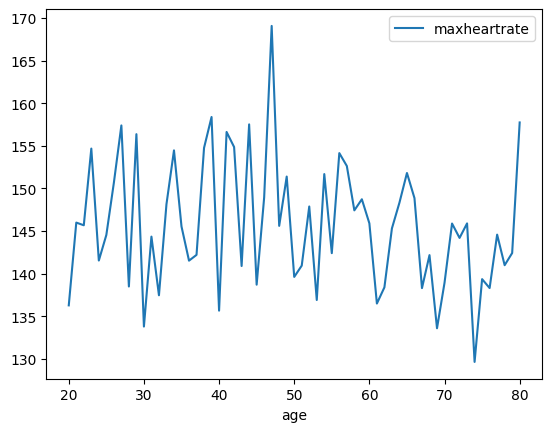

In [19]:
agedf.plot(y = 'maxheartrate' , use_index = 'True')

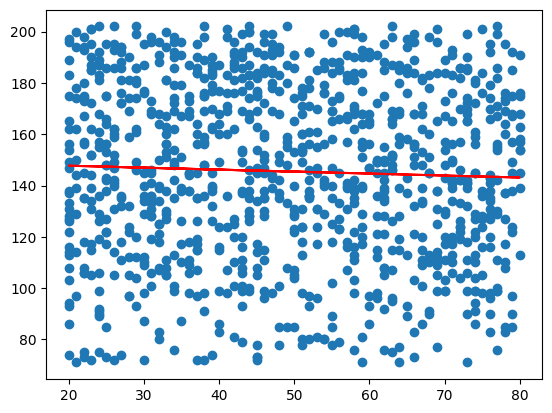

In [18]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.iloc[:, 8].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

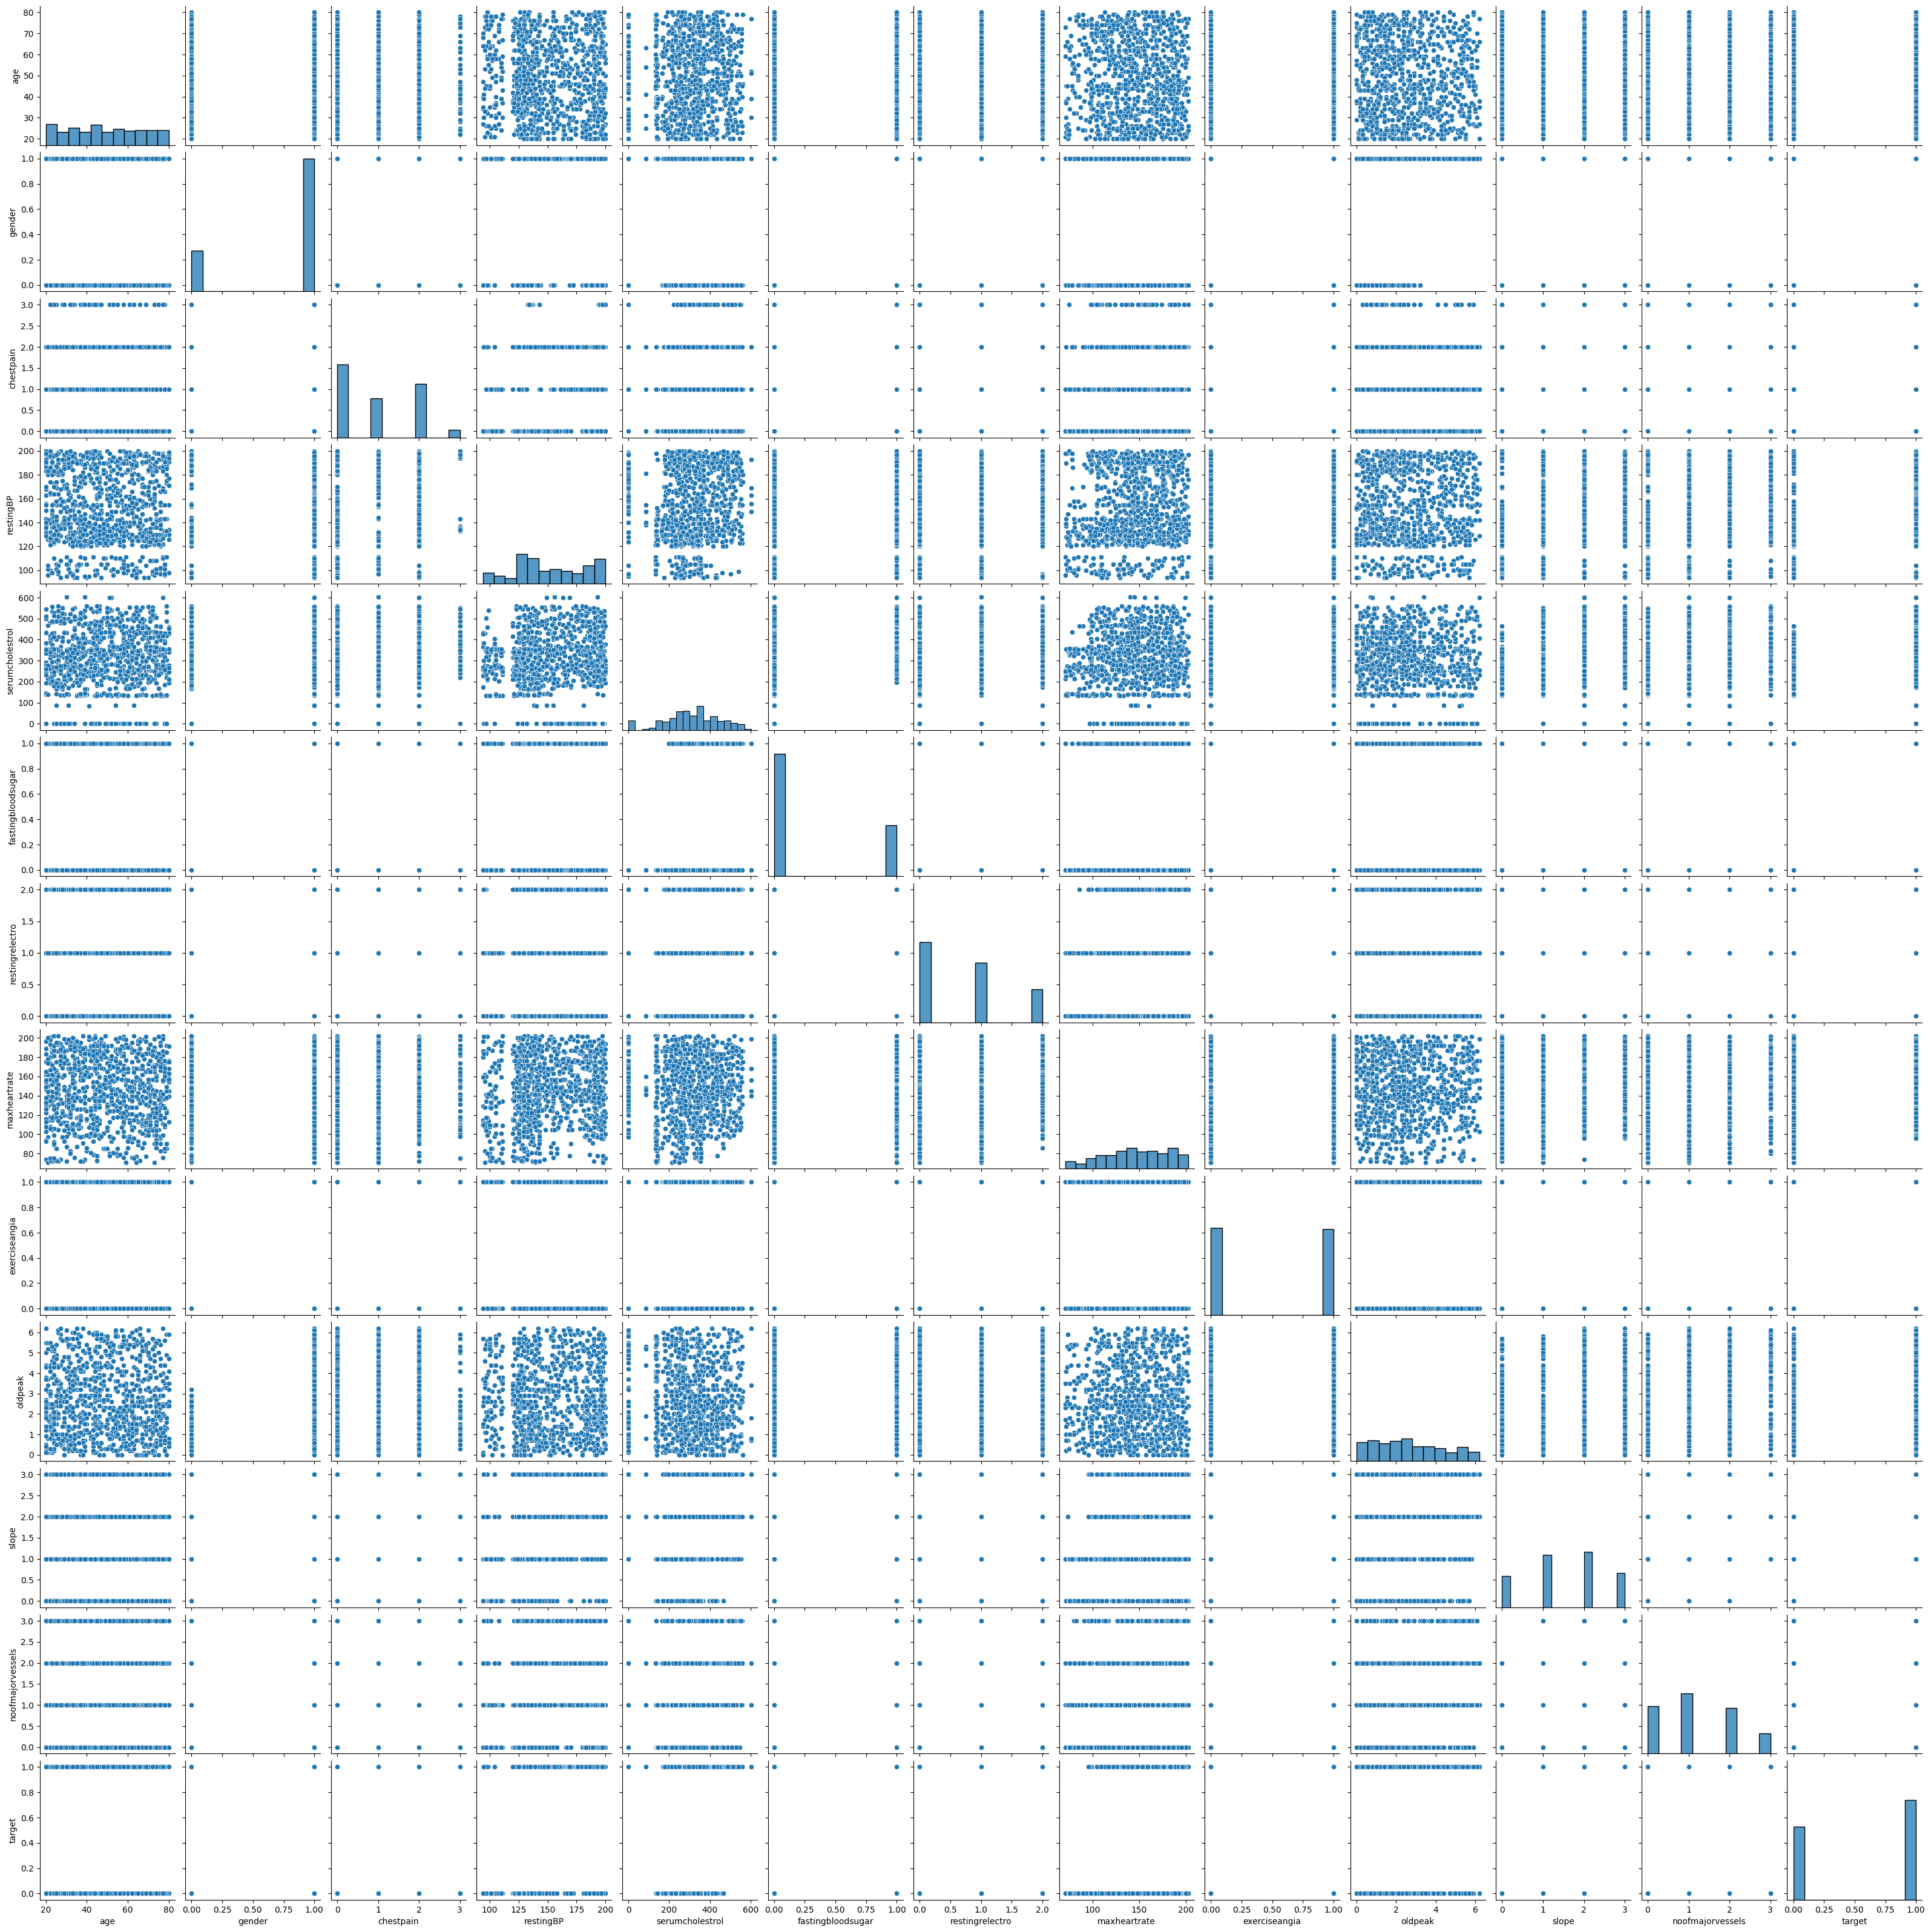

In [35]:
import seaborn as sns
sns.pairplot(df)

# Train/Test Split

In [33]:
df

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [32]:
df.drop(['patientid'], axis=1 , inplace = True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['target'], test_size=0.2, random_state=42)

In [44]:
features = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol','fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score 

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)

print(acc_rf)

0.9840425531914894
